In [1]:
import numpy as np
import pandas as pd
%pylab inline
import matplotlib.pyplot as plt
#import Quandl
import statsmodels.formula.api as smf
from scipy import stats
import statsmodels.api as sm
#from stats.api import ols

from sklearn.model_selection import train_test_split
from sklearn import linear_model

Populating the interactive namespace from numpy and matplotlib


C:\Users\Jonathan\Anaconda2\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# IMPORTANT

In [2]:
# The notebook should be named as ADS_HW5_<net_id> - COMPLETE
# 10 pts will be deducted if the naming convention is not followed

# Task 1 (5 pts) 


**a) Provide a definition for the concept of a conjugate prior given the Bayesian learning model**

Conjugate distributions are those whose prior and posterior distributions are from the same family, and the prior is called the conjugate prior. It is favoured for its algebraic conveniences, especially when the likelihood has a distribution in the form of exponential family (Gaussian, Beta, etc.).

Definition (Conjugacy). A collection of pdfs (or pmfs) is called a conjugate prior family for a model X ∼ $f(x|θ)$, $θ$ ∈ $Θ$, if whenever a prior $ξ(θ)$ is chosen from the collection, it leads to a posterior $ξ(θ|x)$ that is also a member of the collection, for every observation $X$ = $x$

We're looking for examples such as:
$$
p(θ|y=y_i, x=x_i)p(y=y_i, x=x_i) =  p(y=y_i|θ,x=x_i)p(θ),
$$

i.e. 
$$
p(θ|y=y_i, x=x_i) = \frac{p(y=y_i|w,x=x_i)p(θ)}{p(y=y_i, x=x_i) }
$$



b) **True** or False:
Selecting a Gaussian prior for a likelihood function that is Gaussian, will ensure that the posterior distribution is also Gaussian

**This statement is TRUE**

# Task 2 (5 pts). 


**1) In the Bayesian linear regression framework (True or False) **

   a) Using a Laplacian prior will lead to the Ridge Regression  - **This statement is FALSE**
   
   b) Using a Laplacian prior will lead to Lasso Regression - **This statement is TRUE**
    

**2) (True or False)  **

a) Ridge can often help with feature selection   - **This statement is FALSE**
    
b) Lasso can often help with feature selection   - **This statement is TRUE**

# Task 3 (10 pts). 
Answer some questions about the properties of Lasso/Ridge:

**1.a) Which regression adds penalty equivalent to square of the magnitude of coefficients?**



   RIDGE 

**1.b) Which regression adds penalty  equivalent to absolute value of the magnitude of coefficients?**




LASSO

**2) Which of the Lasso and Ridge regressions possess an analytic solution in the closed form?** 

RIDGE (as it incorporates power function (squared), whereas ridge includes absolute value function which isn't differentiable)



**3) Which of the Lasso and Ridge regression is often use to completely eliminate coefficients for some of the regressors?**


LASSO can eliminate regressors (ridge will include them all in different weights)


**4) Which value of $\lambda$ makes Lasso and Ridge identical to the ordinary least square regression?** 


If $\lambda$ = 0, Lasso and Ridge will be identical to ordinary least square regression.


**5) What dataset (training, validation or test) you would use to estimate the $\lambda$ for Lasso or Ridge?**


Use a **validation** set to estimate the $\lambda$ for Lasso or Ridge


# Extra Credit(50 pts to be applied towards this or any other homework)
**For a regression where the variables are highly correlated, which would you use, Lasso or Ridge and why?**

If the variables are highly correlated, choose **RIDGE**. It will include all variables in the model but the coefficients will be distributed among the correlated ones depending on the correlation.

Lasso will arbitrarily select any one feature among the highly correlated ones and reduce coefficients of the rest to zero. Also, the chosen variable changes randomly with change in model parameters. This generally doesn’t work that well as compared to ridge regression. 

(Source: https://www.analyticsvidhya.com/blog/2016/01/complete-tutorial-ridge-lasso-regression-python/)

# Task 4 (15 pts). 
Consider a Bayesian univariate linear regression $y\sim {\cal N}(wx,\sigma^2)$ with a given $\sigma=2$ and the prior $w\sim {\cal N}(4,2)$. Compute the posterior distribution after an observation $y=14,x=4$. After all, what is the probability of having $w<4$?

Use the following formula from the notes:
$$
p(w|Y, X) \sim {\cal N}\left(\frac{ \sigma^{-2} \sum_i y_i x_i +(\sigma^*)^{-2} w^*}{\left(\sum_i x_i^2\sigma^{-2}+(\sigma^*)^{-2}\right)},
\frac{1}{\sqrt{(\sigma^*)^{-2}+\sum_i x_i^2\sigma^{-2}}}\right)
$$

In [3]:

sigma = 2

yObs = 14
xObs = 4

sigmaStar = 2
wStar = 4

wMean = ( sigma ** (-2) * yObs * xObs + sigmaStar ** (-2) * wStar ) / ( ( xObs / sigma ) ** 2 + sigmaStar ** (-2))
wVariance = 1 / np.sqrt( ( xObs / sigma ) ** 2 + sigmaStar ** (-2))

print('Therefore w follows a normal distribution with mean {}'.format(round(wMean, 4))+', and variance {}.'.format(round( wVariance, 4)))


Therefore w follows a normal distribution with mean 3.5294, and variance 0.4851.


In [4]:
wThresh = 4

probLessThanWThresh = round(stats.norm.cdf(wThresh,wMean,np.sqrt(wVariance)),4)

In [5]:
print('The probability w < {} '.format(wThresh) + 'given y = 14, and x = 4 is: {}%'.format(100 * probLessThanWThresh ))

The probability w < 4 given y = 14, and x = 4 is: 75.04%


# Task 5 (20 pts)
For the training and test sets provided below, train a linear regression of $y$ (last column) vs the rest of the columns of the table treated as regressors (intercept excluded) over the training set, apply it to the test set and report it's R2 performance over both - training and test set.

In [6]:
data_train=pd.read_csv("HW_train.csv")
data_test=pd.read_csv("HW_test.csv")

# Remove unwanted column
data_train.drop('Unnamed: 0',axis=1, inplace=True)
data_test.drop('Unnamed: 0',axis=1, inplace=True)

In [7]:
data_train.head()

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,96.789835,83.183133,24.177181,31.279398,-49.029524,18.872176,168.942794,94.488018,177.780409,27.695043,...,41.924134,65.876185,35.898562,34.726463,60.166744,22.004965,43.487052,60.069264,63.794491,65.691782
1,38.829317,35.843956,6.297793,15.523440,-21.995928,5.945662,72.037611,42.709207,75.362195,10.284752,...,73.765030,47.088544,43.625197,1.265374,53.481250,61.989699,22.419371,72.934372,8.783550,48.600203
2,29.925224,25.328958,0.102627,10.403224,-16.379497,4.272577,54.941945,33.758282,58.327999,5.344682,...,17.970740,28.483208,43.124356,75.088879,16.991777,3.603125,70.197916,45.761354,16.291789,11.967305
3,33.424303,27.676937,4.533496,12.010908,-18.159244,4.777495,54.333856,31.886517,61.607712,6.907591,...,97.752102,0.751484,20.599931,95.431639,30.861203,22.548684,93.988541,12.820426,47.022745,15.988018
4,69.816320,61.489566,17.181358,24.093144,-35.745184,13.386441,122.288929,68.878098,128.452555,18.808763,...,70.996612,86.602438,98.127347,5.357836,87.865145,40.298166,86.488322,60.963969,84.368874,53.736157


In [8]:
data_train.describe()

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,...,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,45.331219,39.288843,7.659490,15.189827,-24.673478,7.728895,78.507719,45.796638,83.506072,11.222028,...,53.430396,46.809873,54.649691,53.896206,59.414295,42.355635,44.172360,48.189314,52.385885,37.367483
std,28.616656,25.387507,9.453273,8.675795,14.454238,6.196279,50.358024,26.980636,52.492382,9.034226,...,31.463575,33.165057,22.269669,28.368323,25.923605,28.128672,27.532968,24.884620,32.839768,21.303244
min,1.073692,0.029101,-7.262053,0.023545,-50.181926,-2.187906,0.781019,4.098394,3.265841,-3.642719,...,4.879681,-0.285463,15.314588,1.265374,9.272100,3.603125,1.421333,9.501933,-2.171087,0.769027
25%,24.190761,19.927596,0.331003,7.721968,-35.639845,3.347397,38.707477,24.673994,43.411697,4.100761,...,27.030489,18.756063,37.481763,33.248312,37.210995,17.752898,24.144764,30.226750,23.151379,19.813486
50%,37.839800,34.007896,6.209907,13.989478,-20.722144,6.281803,67.057744,39.947787,70.343956,9.686269,...,54.951240,40.843289,55.557605,59.605424,61.727835,41.996604,42.582592,52.219685,53.028826,39.114705
75%,67.211289,58.578990,14.143492,21.975734,-13.460048,12.107222,116.020359,64.287697,123.373390,17.991635,...,78.073594,78.623869,69.361031,74.035550,84.346883,66.927975,66.221243,69.063953,81.172925,53.637582
max,96.789835,83.183133,24.177181,31.279398,-2.599588,19.512514,168.942794,94.488018,177.780409,27.695043,...,99.294313,95.124545,98.127347,100.481073,94.060541,94.685387,93.988541,85.864176,98.501147,74.810122


In [9]:
result = smf.ols(formula = 'Q("40") ~ Q("'+ '") + Q("'.join(data_train.columns[:-1]) + '") - 1', data = data_train).fit()
OLS_coef=result.params
print('The R-squared for the model is: {} '.format(result.rsquared))

The R-squared for the model is: 1.0 


In [10]:
# For displaying R^2 and linear model summary
def modelEval(lm, key = 'Y'):
    lmy = lm.predict(data_test)
    y_err = lmy - data_test[key]
    y_norm = data_test[key]-np.mean(data_test[key])
    return 1-y_err.dot(y_err)/y_norm.dot(y_norm)  # R2 w.r.t. test set

In [11]:
print('In sample R-squared: %f'%result.rsquared)
print('Out of sample R-squared: %f'%modelEval(result,'40'))
print('Fitted coefficients:')
print(result.params)

In sample R-squared: 1.000000
Out of sample R-squared: -1.027964
Fitted coefficients:
Q("0")     2.309618
Q("1")     4.714915
Q("2")    -1.605535
Q("3")    -0.952359
Q("4")    -4.017720
Q("5")    -0.238134
Q("6")    -1.756060
Q("7")    -2.152114
Q("8")    -1.024855
Q("9")    -0.478782
Q("10")    2.362976
Q("11")    1.222944
Q("12")   -0.547568
Q("13")    1.570712
Q("14")   -1.582677
Q("15")   -2.189135
Q("16")   -2.251809
Q("17")   -2.251971
Q("18")    0.082258
Q("19")   -2.077975
Q("20")    1.494313
Q("21")    0.215305
Q("22")    0.058794
Q("23")    0.116286
Q("24")    0.181049
Q("25")    0.079979
Q("26")    0.078714
Q("27")   -0.268590
Q("28")   -0.134989
Q("29")   -0.005605
Q("30")   -0.030090
Q("31")   -0.024276
Q("32")    0.135952
Q("33")   -0.016106
Q("34")   -0.155001
Q("35")   -0.137355
Q("36")   -0.334650
Q("37")    0.017861
Q("38")   -0.141513
Q("39")   -0.036982
dtype: float64


# Task 6 (20 pts)
Train Lasso and Ridge regressions using the training sample above with $\lambda_{Ridge}=3000$ and $\lambda_{Lasso}=30$ and report their performance over the test set.

In [12]:

X_train,  y_train = data_train.drop(["40"], axis = 1), data_train["40"]

X_test, y_test = data_test.drop(["40"], axis = 1), data_test["40"]


In [13]:
Ridge=linear_model.Ridge(fit_intercept = True, alpha = 3000) #try Ridge with an arbitrary regularization parameter lambda=1

Ridge.fit(X_train,y_train)
# In the sample:
p_IS=Ridge.predict(X_train)
err_IS=p_IS - y_train
R_2_IS_Ridge=1 - np.var(err_IS)/np.var(y_train)
print("The R-squared we found for IS Ridge is: {0}".format(R_2_IS_Ridge))

Ridge_coef=Ridge.coef_

#Out of sample
p_OS=Ridge.predict(X_test)
err_OS = p_OS-y_test
R_2_OS_Ridge = 1-np.var(err_OS)/np.var(y_test)
print("The R-squared we found for OS Ridge is: {0}".format(R_2_OS_Ridge))

The R-squared we found for IS Ridge is: 0.919670798394
The R-squared we found for OS Ridge is: 0.521078167083


#### The performance of Ridge with  $\lambda_{Ridge}=3000$ over the test set reports an R-squared of 0.5211

In [14]:
Lasso = linear_model.Lasso(fit_intercept = True, alpha = 30)
#try Lasso with a selected regularization parameter lambda

Lasso.fit(X_train,y_train)
# In the sample:
p_IS = Lasso.predict(X_train)
err_IS = p_IS-y_train
R_2_IS_Lasso = 1 - np.var(err_IS)/np.var(y_train)
print("The R-squared we found for IS Lasso is: {0}".format(R_2_IS_Lasso))

Lasso_coef = Lasso.coef_
#Out of sample
p_OS = Lasso.predict(X_test)
err_OS = p_OS-y_test
R_2_OS_Lasso = 1-np.var(err_OS)/np.var(y_test)
print("The R-squared we found for OS Lasso is: {0}".format(R_2_OS_Lasso))

The R-squared we found for IS Lasso is: 0.878135684241
The R-squared we found for OS Lasso is: 0.648004682015


#### The performance of Lasso with $\lambda_{Lasso}=30$ over the test set reports an R-squared of 0.6480

# Task 7 (25 pts)
a) For each $m=0,1,2,...39$ train OLS, Lasso and Ridge regressions(keep intercept) using the data from Task 5 above with $\lambda_{Ridge}=3000$ and $\lambda_{Lasso}=30$ using the first $m$ columns of the data tables as the regressors  
i.e train the models by adding in a new variable each time. eg. Y~ x0, Y~x0+x1, Y~x0+x1+x2...Y~x0+x1+...+x39  


In [15]:
OLS_R_2_OS_F=[]
OLS_R_2_IS_F=[]
OLS_R_2_Ridge_OS_F=[]
OLS_R_2_Ridge_IS_F=[]
OLS_R_2_Lasso_OS_F=[]
OLS_R_2_Lasso_IS_F=[]
Number_variables=range(len(data_train.columns[:-1]))

Ridge=linear_model.Ridge(fit_intercept=True,alpha=3000)
Lasso=linear_model.Lasso(fit_intercept=True, alpha=30)

for j in Number_variables:
    # OLS

    lm = smf.ols(formula = 'Q("40") ~ Q("'+ '") + Q("'.join(data_train.columns[:j+1]) + '") - 1', data = data_train).fit()
    
    error = lm.predict(X_test.ix[:,:j+1]) - y_test
    R_2_OS_OLS=1-error.var()/y_test.var()
    R_2_IS_OLS = lm.rsquared
    OLS_R_2_IS_F.append(R_2_IS_OLS)
    OLS_R_2_OS_F.append(max(R_2_OS_OLS,0))
    
    # Ridge
    Ridge.fit(X_train.ix[:,:j+1],y_train)
    
    # In sample:
    err_IS=Ridge.predict(X_train.ix[:,:j+1]) - y_train
    R_2_IS_Ridge=1-np.var(err_IS)/np.var(y_train)
    OLS_R_2_Ridge_IS_F.append(R_2_IS_Ridge)
    
    #Out of sample
    err_OS=Ridge.predict(X_test.ix[:,:j+1]) - y_test
    R_2_OS_Ridge=1-np.var(err_OS)/np.var(y_test)
    OLS_R_2_Ridge_OS_F.append(max(R_2_OS_Ridge,0))

    # Lasso
    
    Lasso.fit(X_train.ix[:,0:j+1],y_train)
    
    #In sample:
    p_IS=Lasso.predict(X_train.ix[:,0:j+1])
    err_IS=p_IS-y_train
    R_2_IS_Lasso=1-np.var(err_IS)/np.var(y_train)
    OLS_R_2_Lasso_IS_F.append(R_2_IS_Lasso)

    #Out of sample
    p_OS=Lasso.predict(X_test.ix[:,0:j+1])
    err_OS=p_OS-y_test
    R_2_OS_Lasso=1-np.var(err_OS)/np.var(y_test)
    OLS_R_2_Lasso_OS_F.append(max(R_2_OS_Lasso,0))



C:\Users\Jonathan\Anaconda2\lib\site-packages\ipykernel_launcher.py:17: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
C:\Users\Jonathan\Anaconda2\lib\site-packages\ipykernel_launcher.py:24: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated



b) Plot the in-sample (training) and out-of-sample (test) R2 for all three models on the same graph.  
i.e (x-axis is number of regressors, y will be your R^2 for InSample & OutSample for each of the 3 models, all in one graph)


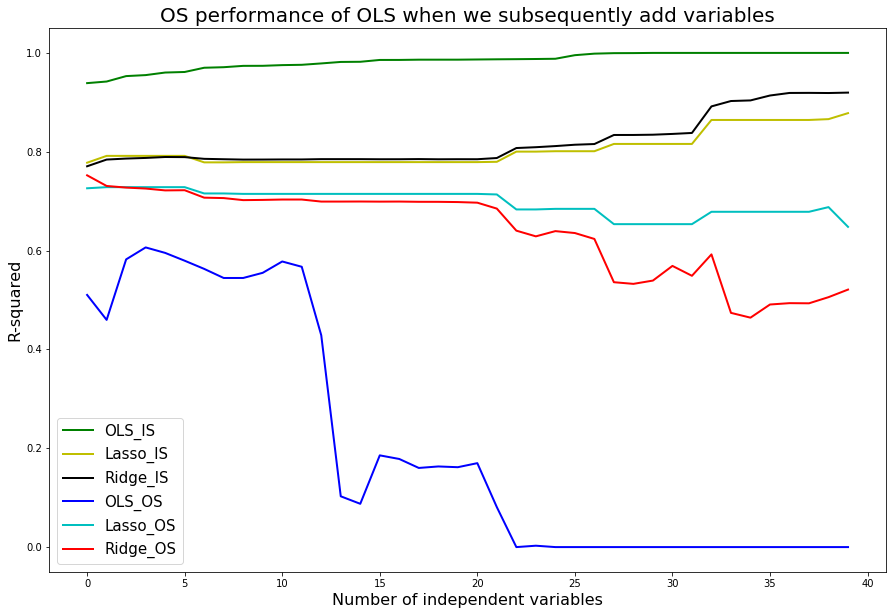

In [16]:

plt.figure(figsize=(15,10))
plt.title('OS performance of OLS when we subsequently add variables', fontsize = 20)

plt.plot(Number_variables,OLS_R_2_IS_F,'g',label='OLS_IS', linewidth=2.0)
plt.plot(Number_variables,OLS_R_2_Lasso_IS_F,'y',label='Lasso_IS', linewidth=2.0)
plt.plot(Number_variables,OLS_R_2_Ridge_IS_F,'k',label='Ridge_IS', linewidth=2.0)

plt.plot(Number_variables,OLS_R_2_OS_F,'b',label='OLS_OS', linewidth=2.0)
plt.plot(Number_variables,OLS_R_2_Lasso_OS_F,'c',label='Lasso_OS', linewidth=2.0)
plt.plot(Number_variables,OLS_R_2_Ridge_OS_F,'r',label='Ridge_OS', linewidth=2.0)

plt.legend(fontsize = 15)
plt.xlabel('Number of independent variables', fontsize = 16)
plt.ylabel('R-squared', fontsize = 16)
plt.show()

Reviewing the result above, Lasso provides better out of sample $R^2$ results (except for small numbers of IV's). 

It is difficult to compare though because we have chosen somewhat arbitrary values for $\lambda_{Lasso}$ and $\lambda_{Ridge}$.

If we had chosen optimal values for each of these, we could more appropriately compare them.

# Extracredit (100 pts of credit to be applied towards this or any other homework)
Using a series of 10 random splits (cross-validation) of the training sample into approximately 70% training and 30% validation samples perform the selection of the optimal $\lambda$ for Ridge and Lasso regression:   

a) For each $\lambda$ of an assumed sequence of $\lambda$'s(take a random range) compute validation R2 for all the 10 splits and finally select the $\lambda$ having the highest value for validation R2 for each split.  



In [17]:
# Create 10 random splits of data for cross validation
np.random.seed(999)

splitFactors = np.random.normal(0.3,0.05,10)


## For Ridge

In [18]:
#Find the Alpha and report best test performance for Ridge/Lasso.
def Regularization_fit_lambda(model,X_train,y_train,lambdas,p=0.3,Graph=False, logl=False):
    #model = 1-Ridge, 2-Lasso
    #lambdas: a list of lambda values to try
    #p: ratio of the validation sample size / total training size
    #Graph: plot the graph of R^2 values for different lambda

    R_2_OS=[]
    X_train0, X_valid, y_train0, y_valid = train_test_split(X_train,
                                    y_train, test_size = p, random_state = 200)

    if model==1:
        RM = lambda a: linear_model.Ridge(fit_intercept=True, alpha=a)
        model_label='Ridge'
    else:
        RM = lambda a: linear_model.Lasso(fit_intercept=True, alpha=a)
        model_label='Lasso'
    
    best_R2 = -1
    best_lambda = lambdas[0]
    
    for i in lambdas:
        lm = RM(i)
        lm.fit(X_train0,y_train0)  #fit the regularization model
        y_predict=lm.predict(X_valid) #compute the prediction for the validation sample 
        err_OS=y_predict-y_valid
        R_2_OS_=1-np.var(err_OS)/np.var(y_valid)
        R_2_OS.append(R_2_OS_)
        if R_2_OS_ > best_R2:
            best_R2 = R_2_OS_
            best_lambda = i
    
    if Graph==True:
        plt.figure(figsize=(15,10))
        plt.title('IS R-squared vs OS-R-squared for different Lambda', fontsize = 20)
        if logl:
            plt.xlabel('ln(Lambda)', fontsize = 16)
            l=log(lambdas)
            bl=log(best_lambda)
        else:
            plt.xlabel('Lambda', fontsize = 16)
            l=lambdas
            bl=best_lambda
        plt.plot(l,R_2_OS,'b',label=model_label)
        plt.legend(loc='upper right', fontsize = 16)
        plt.ylabel('R-squared', fontsize = 16)
        plt.axvline(bl,color='r',linestyle='--')

        plt.show()
    
    return best_lambda, best_R2

In [19]:
R2_ = []
Lambda_ = []

for q in splitFactors:
    #select best lambda for Ridge
    lambdas = np.exp(np.linspace(-5,13,200))
    lambda_r_optimal=Regularization_fit_lambda(1,X_train,y_train,lambdas,p=q,Graph=False)
    Lambda_.append(lambda_r_optimal[0])
    R2_.append(lambda_r_optimal[1])
    print('For validation data that is {}'.format(100*round(q,4)) + 
          '% of training set, Optimal lambda for Ridge = {}'.format(round(lambda_r_optimal[0]),4) +
          ' with validation R-squared = {}%'.format(100 * round(lambda_r_optimal[1],4)))

For validation data that is 30.64% of training set, Optimal lambda for Ridge = 1483.0 with validation R-squared = 79.75%
For validation data that is 37.01% of training set, Optimal lambda for Ridge = 2129.0 with validation R-squared = 77.47%
For validation data that is 31.57% of training set, Optimal lambda for Ridge = 1483.0 with validation R-squared = 79.75%
For validation data that is 25.71% of training set, Optimal lambda for Ridge = 38476.0 with validation R-squared = 91.41%
For validation data that is 28.67% of training set, Optimal lambda for Ridge = 35148.0 with validation R-squared = 80.89%
For validation data that is 26.76% of training set, Optimal lambda for Ridge = 35148.0 with validation R-squared = 80.89%
For validation data that is 37.83% of training set, Optimal lambda for Ridge = 2129.0 with validation R-squared = 77.47%
For validation data that is 19.54% of training set, Optimal lambda for Ridge = 42118.0 with validation R-squared = 92.53%
For validation data that is 

## For Lasso

In [20]:
R2_ = []
Lambda_ = []

for q in splitFactors:
    #select best lambda for Ridge
    lambdas = np.exp(np.linspace(-5,13,200))
    lambda_r_optimal=Regularization_fit_lambda(2,X_train,y_train,lambdas,p=q,Graph=False)
    Lambda_.append(lambda_r_optimal[0])
    R2_.append(lambda_r_optimal[1])
    print('For validation data that is {}'.format(100*round(q,4)) + 
          '% of training set, Optimal lambda for Lasso = {}'.format(round(lambda_r_optimal[0]),4) +
          ' with validation R-squared = {}%'.format(100 * round(lambda_r_optimal[1],4)))

C:\Users\Jonathan\Anaconda2\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


For validation data that is 30.64% of training set, Optimal lambda for Lasso = 8.0 with validation R-squared = 80.63%
For validation data that is 37.01% of training set, Optimal lambda for Lasso = 40.0 with validation R-squared = 78.81%
For validation data that is 31.57% of training set, Optimal lambda for Lasso = 8.0 with validation R-squared = 80.63%
For validation data that is 25.71% of training set, Optimal lambda for Lasso = 52.0 with validation R-squared = 93.13%
For validation data that is 28.67% of training set, Optimal lambda for Lasso = 75.0 with validation R-squared = 82.07%
For validation data that is 26.76% of training set, Optimal lambda for Lasso = 75.0 with validation R-squared = 82.07%
For validation data that is 37.83% of training set, Optimal lambda for Lasso = 40.0 with validation R-squared = 78.81%
For validation data that is 19.54% of training set, Optimal lambda for Lasso = 52.0 with validation R-squared = 95.23%
For validation data that is 37.28% of training set

b) Visualize the dependence of the validation R2 over $\lambda$s for Lasso and Ridge(x-axis = $\lambda$s from sequence, y-axis = corresponding R^2, graph for each split)


## For Ridge

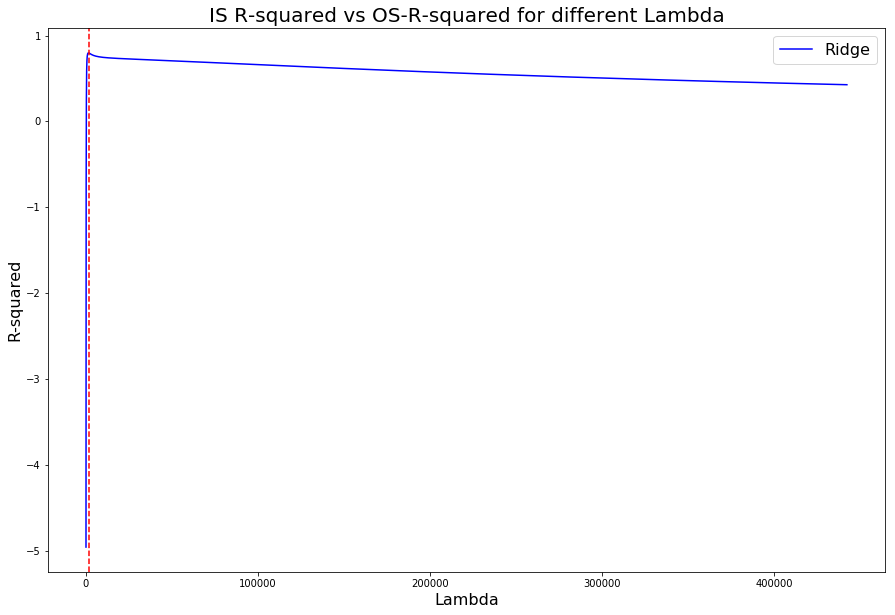

For validation data that is 30.64% of training set, Optimal lambda for Ridge = 1483.0 with validation R-squared = 79.75%


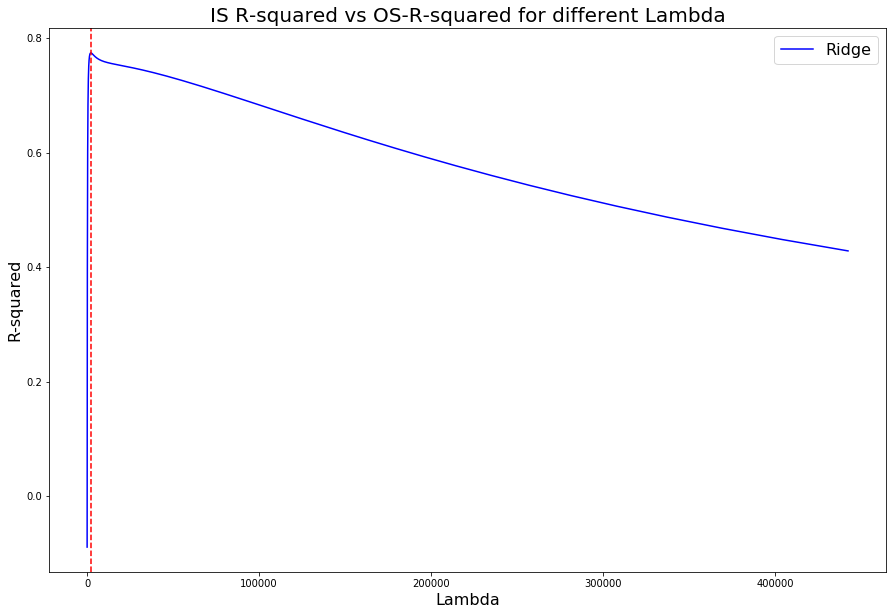

For validation data that is 37.01% of training set, Optimal lambda for Ridge = 2129.0 with validation R-squared = 77.47%


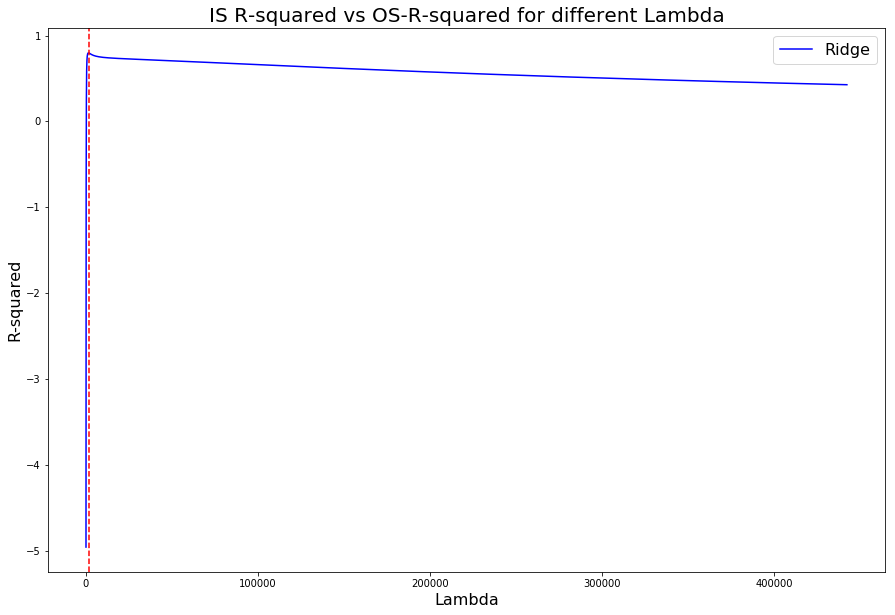

For validation data that is 31.57% of training set, Optimal lambda for Ridge = 1483.0 with validation R-squared = 79.75%


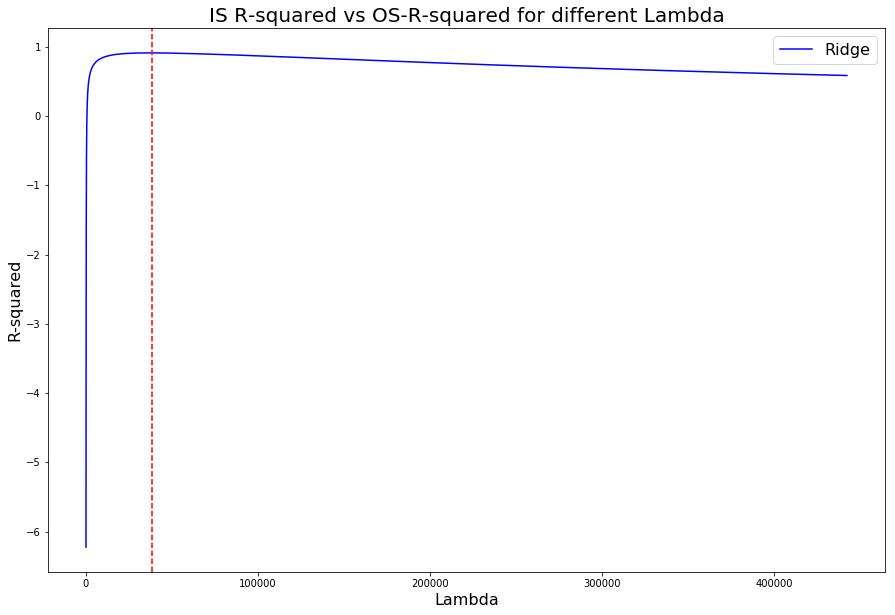

For validation data that is 25.71% of training set, Optimal lambda for Ridge = 38476.0 with validation R-squared = 91.41%


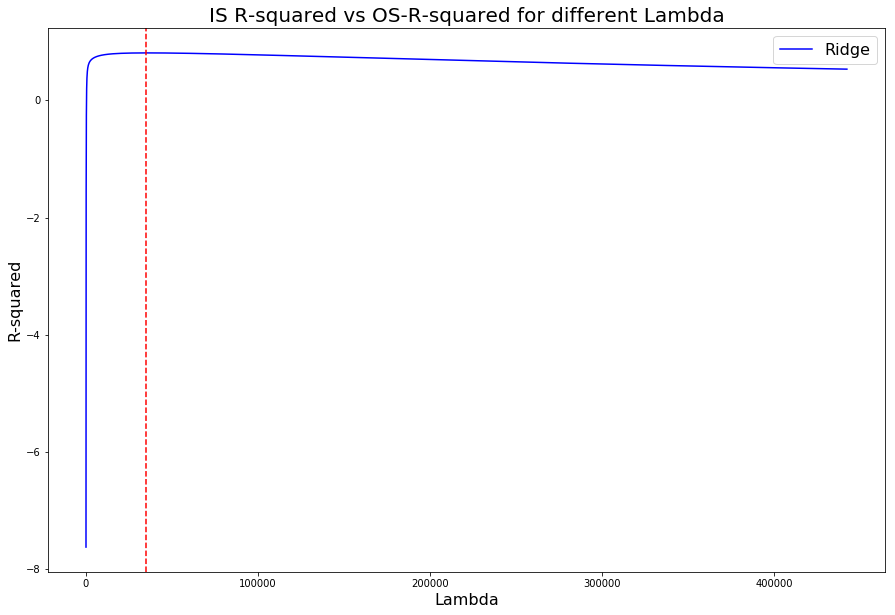

For validation data that is 28.67% of training set, Optimal lambda for Ridge = 35148.0 with validation R-squared = 80.89%


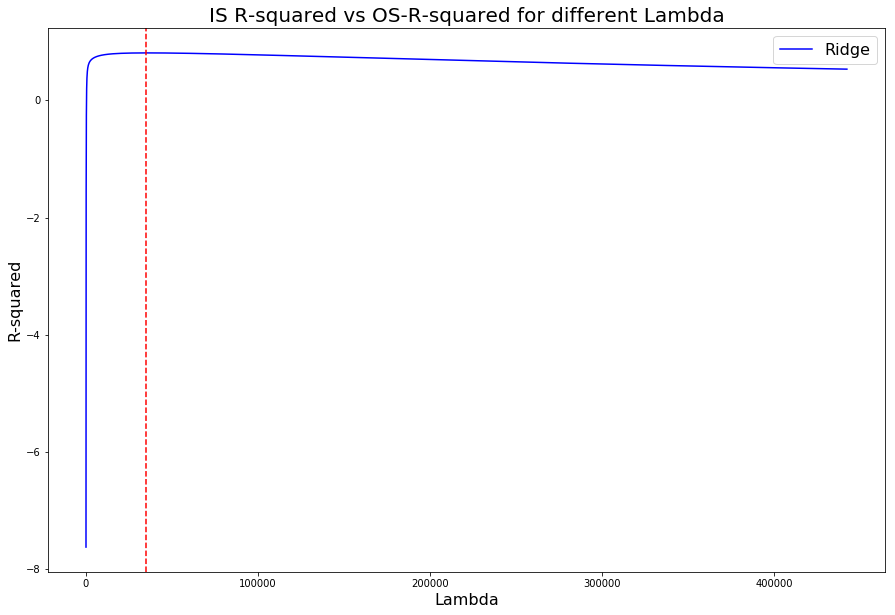

For validation data that is 26.76% of training set, Optimal lambda for Ridge = 35148.0 with validation R-squared = 80.89%


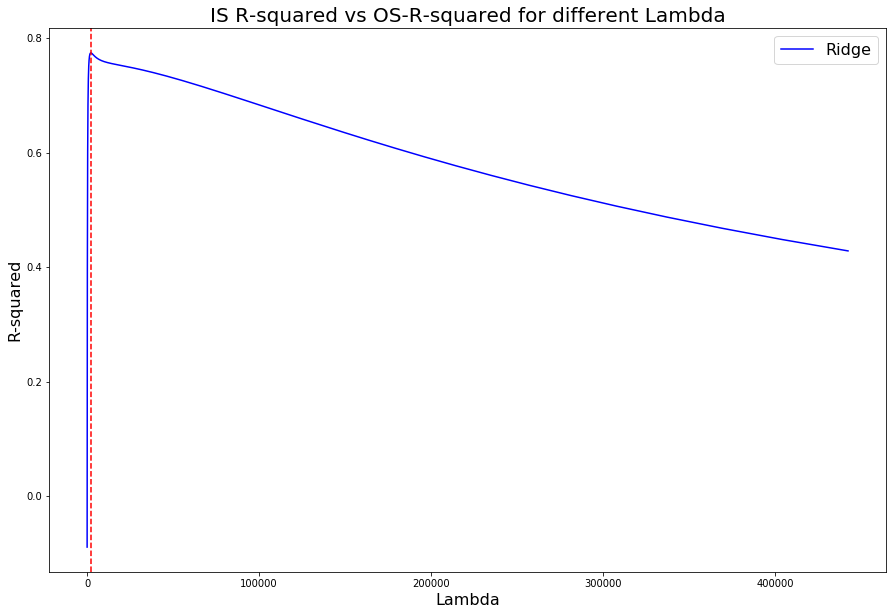

For validation data that is 37.83% of training set, Optimal lambda for Ridge = 2129.0 with validation R-squared = 77.47%


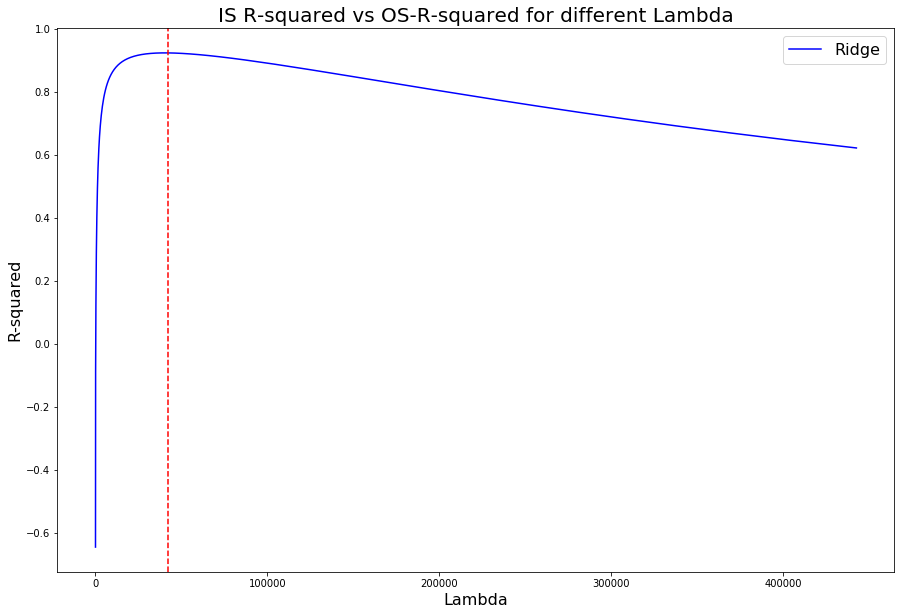

For validation data that is 19.54% of training set, Optimal lambda for Ridge = 42118.0 with validation R-squared = 92.53%


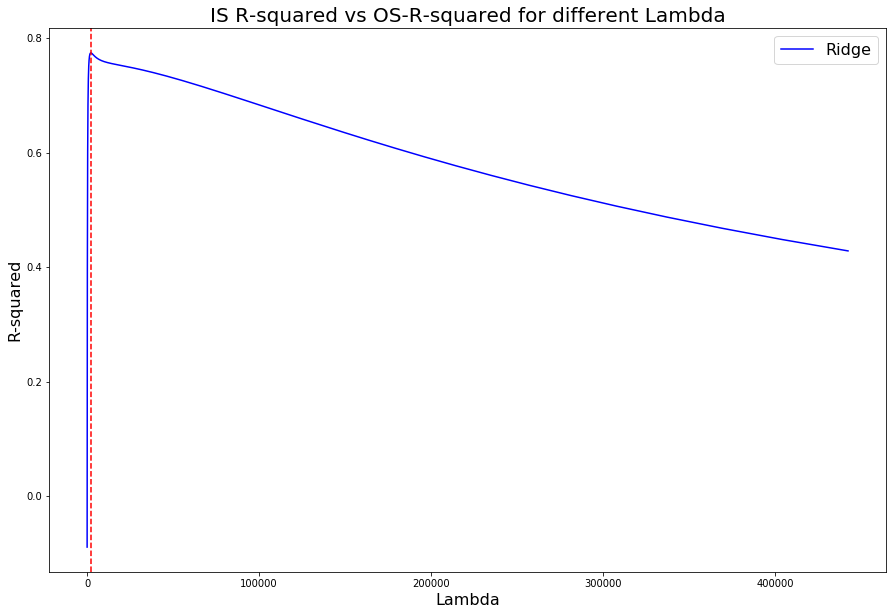

For validation data that is 37.28% of training set, Optimal lambda for Ridge = 2129.0 with validation R-squared = 77.47%


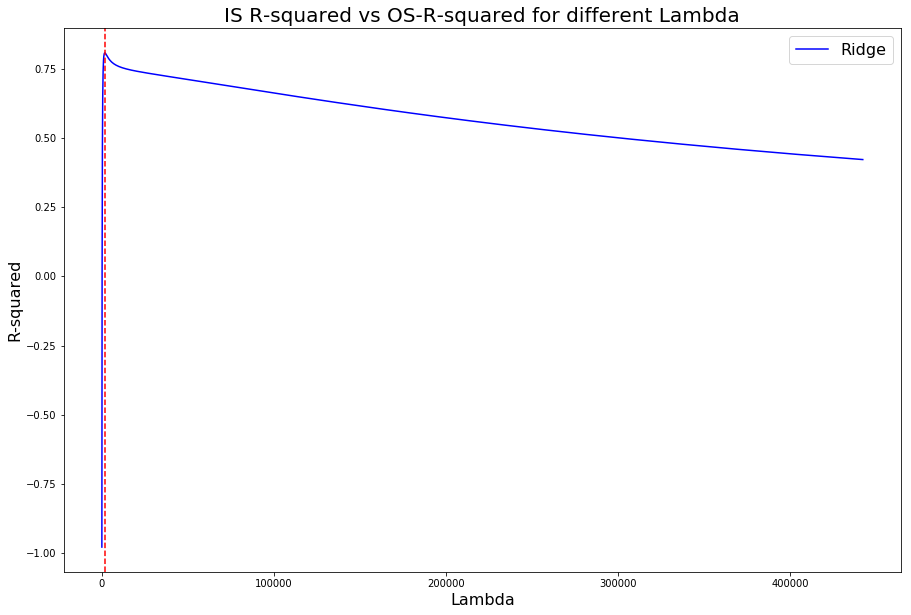

For validation data that is 34.73% of training set, Optimal lambda for Ridge = 1777.0 with validation R-squared = 80.73%


In [21]:
R2_ = []
Lambda_ = []

for q in splitFactors:
    #select best lambda for Ridge
    lambdas = np.exp(np.linspace(-5,13,200))
    lambda_r_optimal=Regularization_fit_lambda(1,X_train,y_train,lambdas,p=q,Graph=True)
    Lambda_.append(lambda_r_optimal[0])
    R2_.append(lambda_r_optimal[1])
    print('For validation data that is {}'.format(100*round(q,4)) + '% of training set, Optimal lambda for Ridge = {}'.format(round(lambda_r_optimal[0]),4) +' with validation R-squared = {}%'.format(100 * round(lambda_r_optimal[1],4)))
    
index_max = np.argmax(R2_)
RidgeLambaOpt = Lambda_[index_max]

## For Lasso

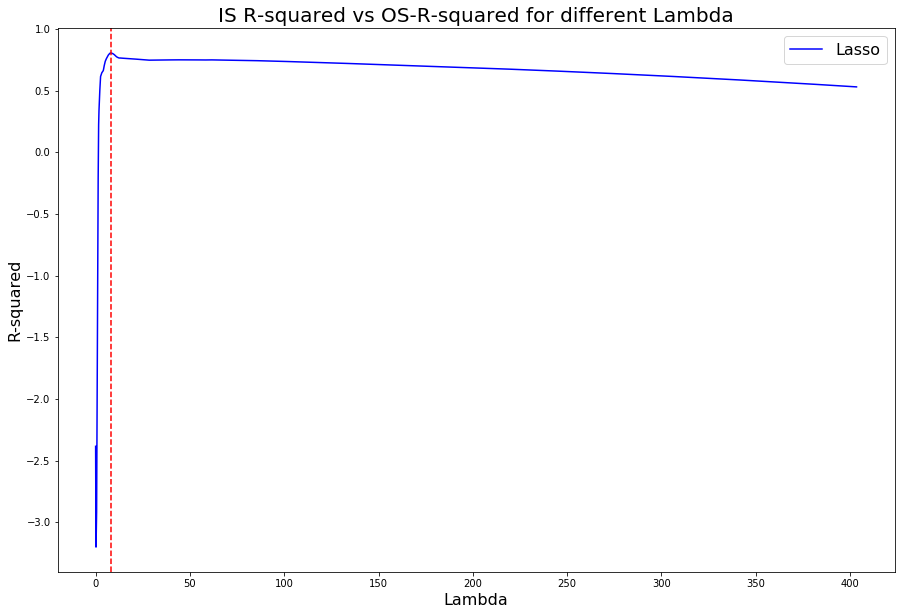

For validation data that is 30.64% of training set, Optimal lambda for Lasso = 8.0 with validation R-squared = 80.68%


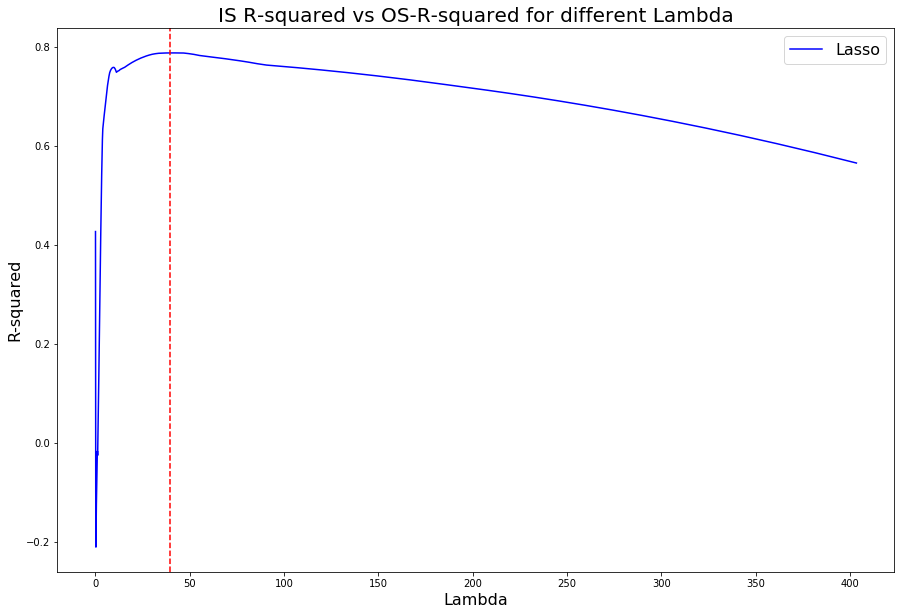

For validation data that is 37.01% of training set, Optimal lambda for Lasso = 40.0 with validation R-squared = 78.81%


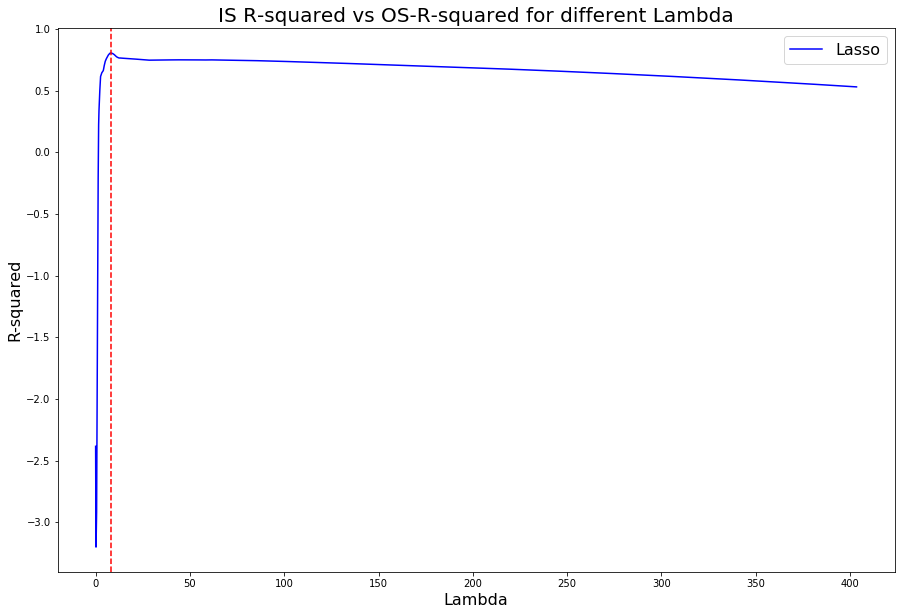

For validation data that is 31.57% of training set, Optimal lambda for Lasso = 8.0 with validation R-squared = 80.68%


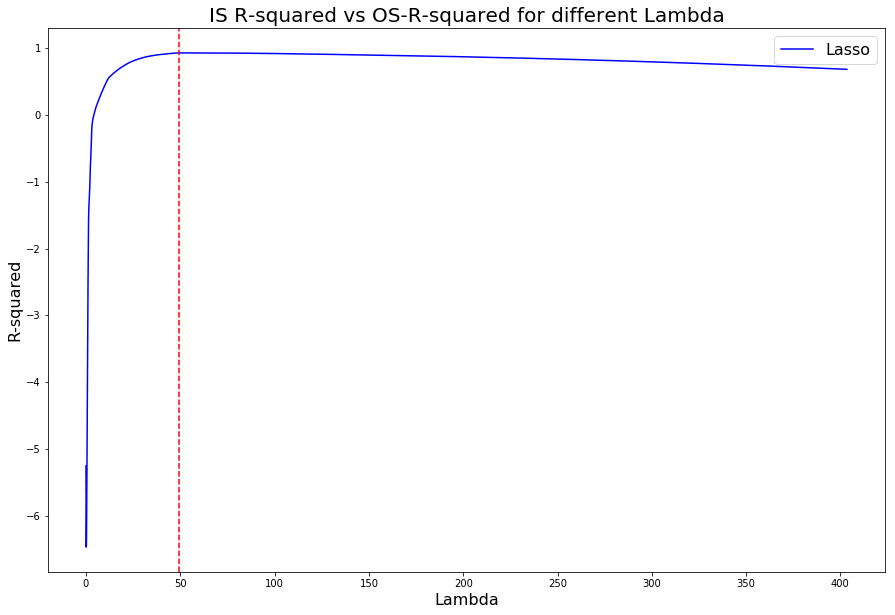

For validation data that is 25.71% of training set, Optimal lambda for Lasso = 49.0 with validation R-squared = 93.15%


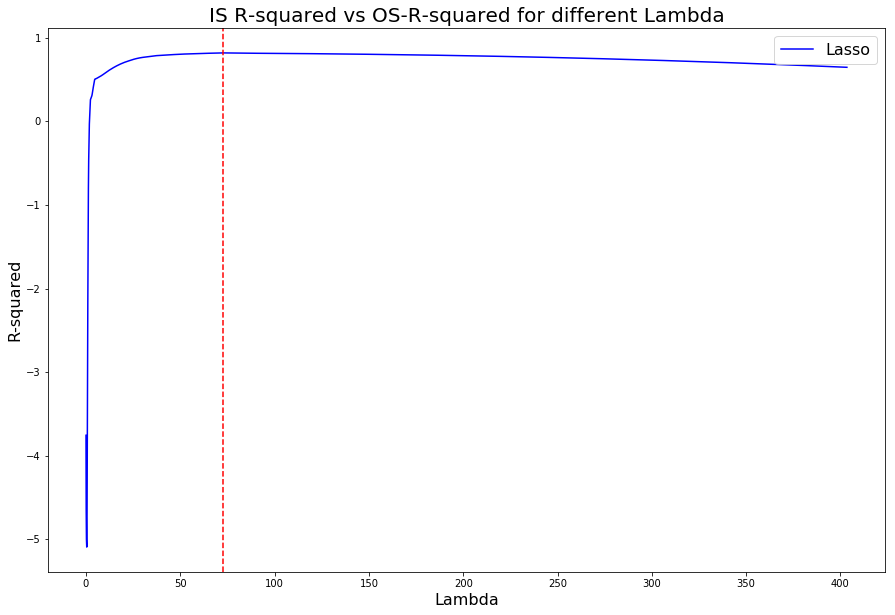

For validation data that is 28.67% of training set, Optimal lambda for Lasso = 73.0 with validation R-squared = 82.12%


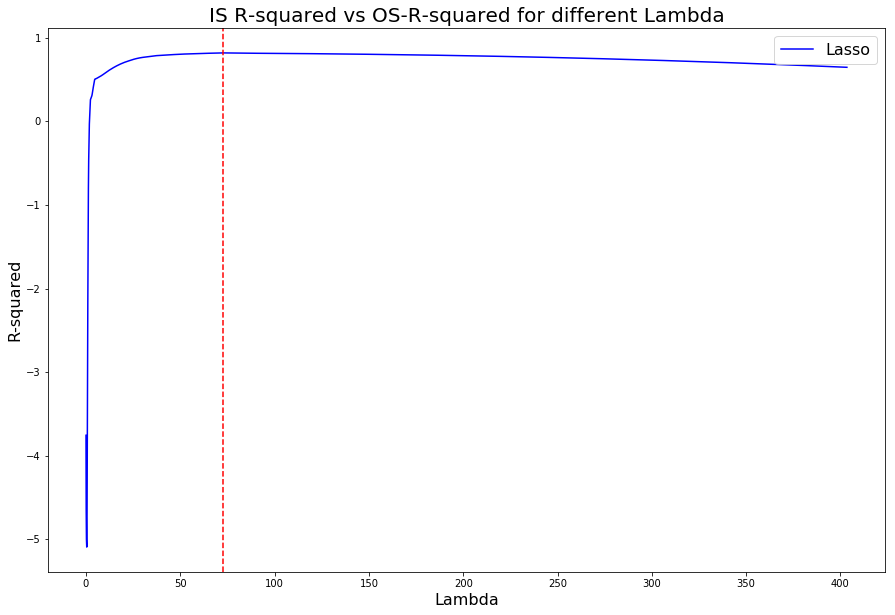

For validation data that is 26.76% of training set, Optimal lambda for Lasso = 73.0 with validation R-squared = 82.12%


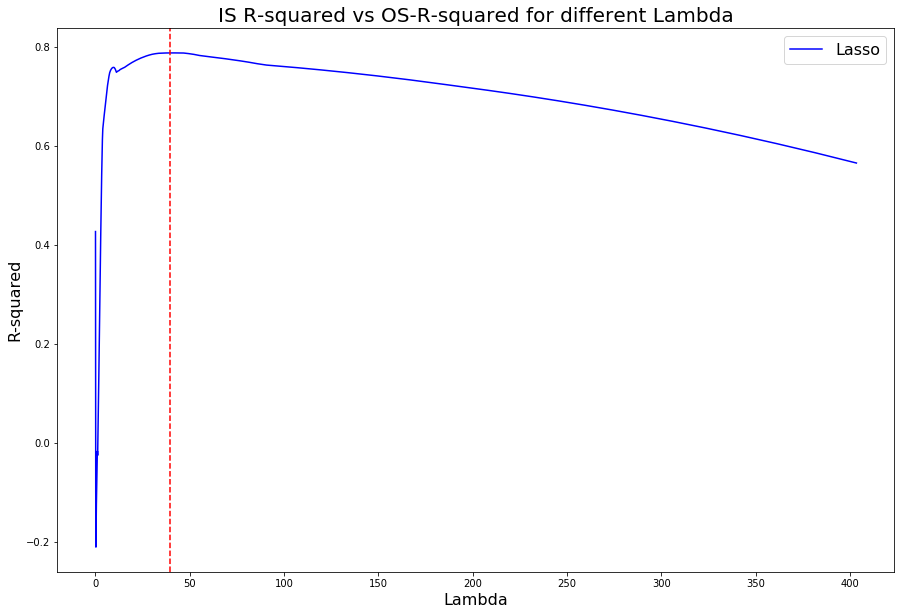

For validation data that is 37.83% of training set, Optimal lambda for Lasso = 40.0 with validation R-squared = 78.81%


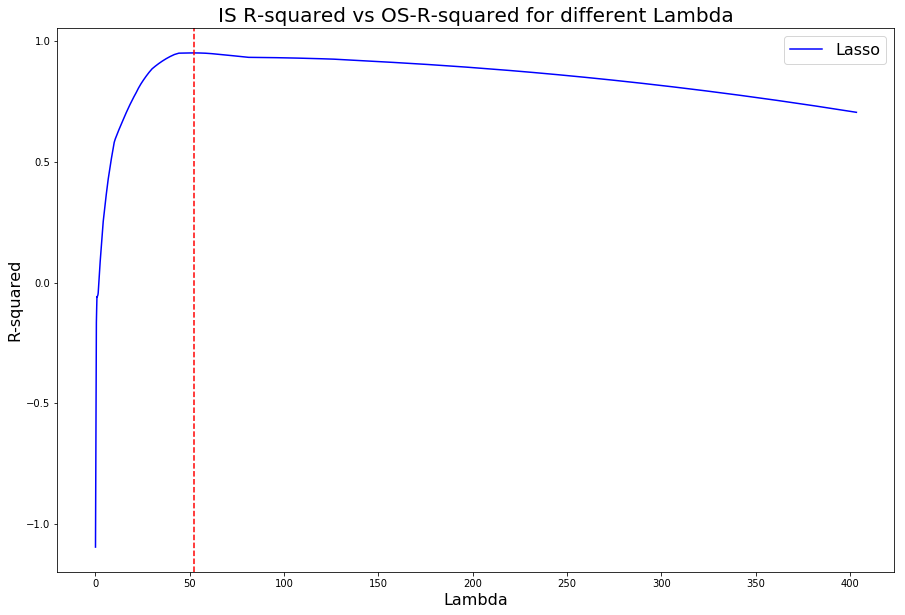

For validation data that is 19.54% of training set, Optimal lambda for Lasso = 52.0 with validation R-squared = 95.23%


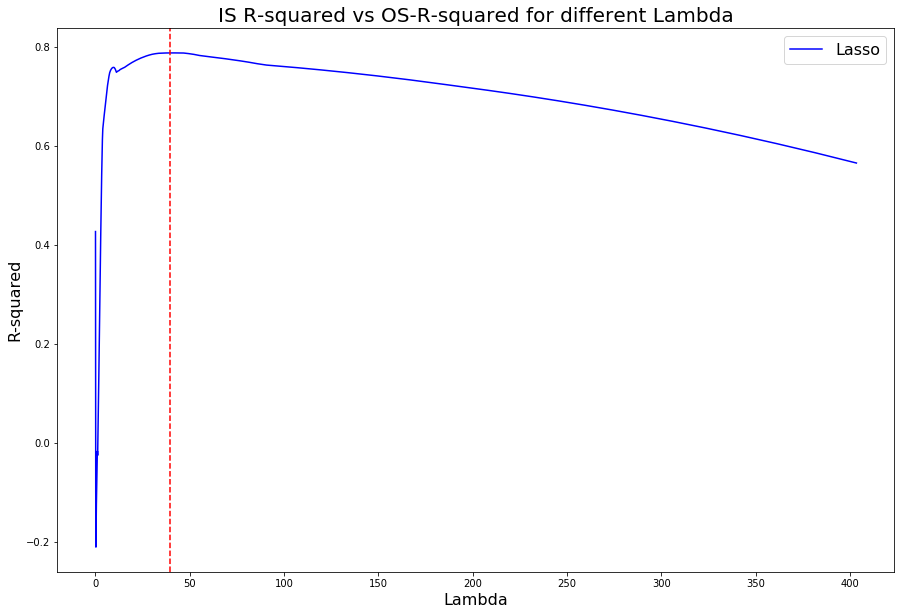

For validation data that is 37.28% of training set, Optimal lambda for Lasso = 40.0 with validation R-squared = 78.81%


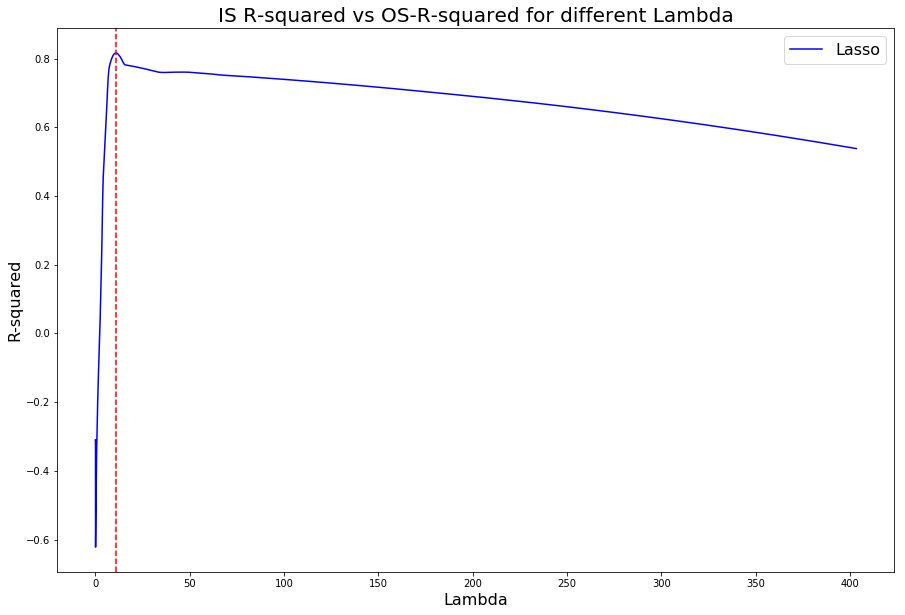

For validation data that is 34.73% of training set, Optimal lambda for Lasso = 11.0 with validation R-squared = 81.63%


In [22]:
R2_ = []
Lambda_ = []

for q in splitFactors:
    #select best lambda for Ridge
    lambdas = np.exp(np.linspace(-5,6,200))
    lambda_r_optimal=Regularization_fit_lambda(2,X_train,y_train,lambdas,p=q,Graph=True)
    Lambda_.append(lambda_r_optimal[0])
    R2_.append(lambda_r_optimal[1])
    print('For validation data that is {}'.format(100*round(q,4)) + '% of training set, Optimal lambda for Lasso = {}'.format(round(lambda_r_optimal[0]),4) +' with validation R-squared = {}%'.format(100 * round(lambda_r_optimal[1],4)))
    
index_max = np.argmax(R2_)
LassoLambaOpt = Lambda_[index_max] 
 
    

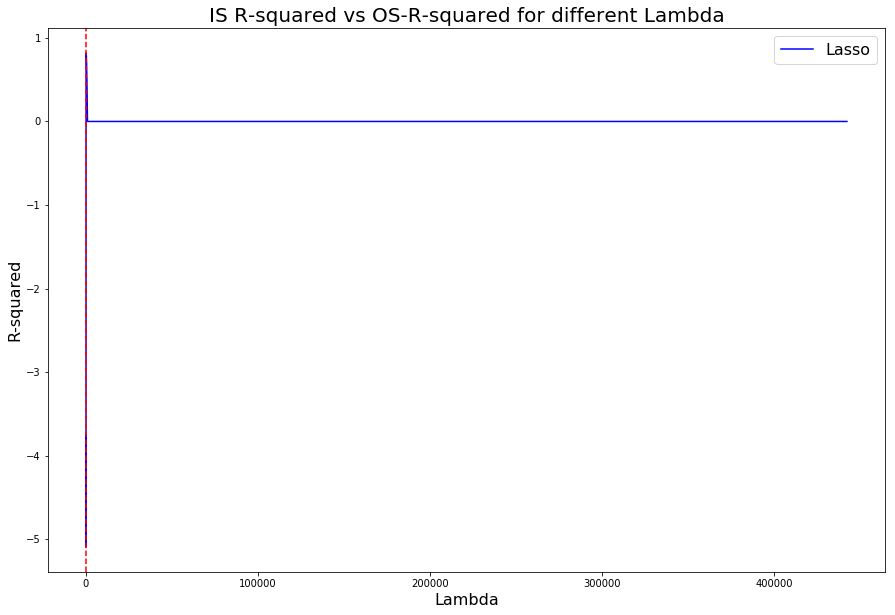

Optimal lambda for Ridge=(74.932140795415918, 0.8207270730561665)


In [23]:
#select best lambda for Ridge
lambdas = np.exp(np.linspace(-5,13,200))
lambda_r_optimal=Regularization_fit_lambda(2,X_train,y_train,lambdas,p=0.3,Graph=True)
print('Optimal lambda for Ridge={0}'.format(lambda_r_optimal))


**c) Report the R2 computed over the test set for the Lasso and Ridge trained over the entire training set with the selected optimal values of $\lambda$ out of the 10 splits.**

### Reviewing results across the 10 splits, we determine the optimal Lamda's:

In [24]:
print(  'The optimal Ridge Lambda is {}'.format(round(RidgeLambaOpt,4)) + 
      ', and optimal Lasso Lambda is {}'.format(round(LassoLambaOpt,4))) 

The optimal Ridge Lambda is 42118.4517, and optimal Lasso Lambda is 52.1839


## For Ridge

In [25]:
Ridge=linear_model.Ridge(fit_intercept = True, alpha = RidgeLambaOpt) #try Ridge with an arbitrary regularization parameter lambda=1

Ridge.fit(X_train,y_train)
# In the sample:
p_IS=Ridge.predict(X_train)
err_IS=p_IS - y_train
R_2_IS_Ridge=1 - np.var(err_IS)/np.var(y_train)
print("The R-squared we found for IS Ridge is: {0}".format(R_2_IS_Ridge))

The R-squared we found for IS Ridge is: 0.850946141257


## For Lasso

In [26]:
Lasso = linear_model.Lasso(fit_intercept = True, alpha = LassoLambaOpt)
#try Lasso with a selected regularization parameter lambda

Lasso.fit(X_train,y_train)
# In the sample:
p_IS = Lasso.predict(X_train)
err_IS = p_IS-y_train
R_2_IS_Lasso = 1 - np.var(err_IS)/np.var(y_train)
print("The R-squared we found for IS Lasso is: {0}".format(R_2_IS_Lasso))

The R-squared we found for IS Lasso is: 0.852158208286
